# Lab Assignment-10
# Cognitive Computing (UCS420)
#Name:- Jatin Jindal
#Roll Number:- 102316061

Question 1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).


In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Before using NLTK tokenizers, download the 'punkt_tab' data
nltk.download('punkt_tab', quiet=True)

# 1. Convert text to lowercase and remove punctuation using re.
paragraph = "My favorite topic is astrophotography. The ability to capture faint light that has traveled across vast cosmic distances and reveal the hidden beauty of nebulae, galaxies, and star clusters is truly captivating. Each image is a testament to the physics of the universe and the power of long exposures. The process involves careful planning, precise tracking of celestial objects, and meticulous post-processing to bring out the intricate details and colors. It connects me to the grandeur of the cosmos and fosters a deep appreciation for our place within it. Moreover, the constant advancements in camera technology and image processing software continually open up new possibilities for capturing even more breathtaking views of the night sky."
lower_case = paragraph.lower()
text_without_punctuation = re.sub(r'[^\w\s]', '', lower_case)

print("Text without punctuation:", text_without_punctuation)

# 2. Tokenize the text into words and sentences.
words_nltk = word_tokenize(text_without_punctuation)
sentences_nltk = sent_tokenize(paragraph)

print("\nWords tokenized using NLTK:", words_nltk)
print("Sentences tokenized using NLTK:", sentences_nltk)

# 3. Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
words_split = text_without_punctuation.split()

print("\nWords split using Python's split():", words_split)
print("\nComparison:")
print("- `split()` typically splits on whitespace. It won't separate punctuation attached to words.")
print("- `word_tokenize()` is more sophisticated and handles punctuation as separate tokens. It also deals with contractions and other linguistic nuances better.")
print("  For example, 'astrophotography.' becomes 'astrophotography' with split, but 'astrophotography' and '.' with word_tokenize().")

# 4. Remove stopwords (using NLTK's stopwords list).
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]

print("\nWords after removing stopwords:", filtered_words)

# 5. Display word frequency distribution (excluding stopwords).
fdist = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
for word, frequency in fdist.most_common():
    print(f"{word}: {frequency}")

Text without punctuation: my favorite topic is astrophotography the ability to capture faint light that has traveled across vast cosmic distances and reveal the hidden beauty of nebulae galaxies and star clusters is truly captivating each image is a testament to the physics of the universe and the power of long exposures the process involves careful planning precise tracking of celestial objects and meticulous postprocessing to bring out the intricate details and colors it connects me to the grandeur of the cosmos and fosters a deep appreciation for our place within it moreover the constant advancements in camera technology and image processing software continually open up new possibilities for capturing even more breathtaking views of the night sky

Words tokenized using NLTK: ['my', 'favorite', 'topic', 'is', 'astrophotography', 'the', 'ability', 'to', 'capture', 'faint', 'light', 'that', 'has', 'traveled', 'across', 'vast', 'cosmic', 'distances', 'and', 'reveal', 'the', 'hidden', 'b

Question 2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
from nltk.corpus import wordnet

# Same paragraph as Q1
paragraph = "My favorite topic is astrophotography. The ability to capture faint light that has traveled across vast cosmic distances and reveal the hidden beauty of nebulae, galaxies, and star clusters is truly captivating. Each image is a testament to the physics of the universe and the power of long exposures. The process involves careful planning, precise tracking of celestial objects, and meticulous post-processing to bring out the intricate details and colors. It connects me to the grandeur of the cosmos and fosters a deep appreciation for our place within it. Moreover, the constant advancements in camera technology and image processing software continually open up new possibilities for capturing even more breathtaking views of the night sky."
lower_case = paragraph.lower()
text_without_punctuation = re.sub(r'[^\w\s]', '', lower_case)
words_nltk = word_tokenize(text_without_punctuation)

# 1. Extract all words with only alphabets using re.findall()
alphabet_words = re.findall(r'[a-z]+', lower_case)
print("Words containing only alphabets:", alphabet_words)

# 2. Remove stop words using NLTK’s stopword list
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]
print("\nWords after removing stopwords:", filtered_words)

# 3. Perform stemming with PorterStemmer
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]
print("\nStemmed words:", stemmed_words)

# 4. Perform lemmatization with WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4', quiet=True)

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_words]
print("Lemmatized words:", lemmatized_words)

# 5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.
print("\nComparison of Stemming and Lemmatization:")
print("- Stemming reduces words to their root form by chopping off suffixes. It's faster but can result in non-meaningful stems (e.g., 'traveled' becomes 'travel').")
print("- Lemmatization reduces words to their base or dictionary form (lemma), considering the word's meaning and context. It's more accurate but computationally more intensive (e.g., 'traveled' becomes 'travel').")
print("\nWhen to prefer Stemming:")
print("- When speed is crucial and a slight loss in accuracy is acceptable (e.g., in some information retrieval tasks).")
print("- When you primarily need to group related words together without necessarily needing the correct dictionary form.")
print("\nWhen to prefer Lemmatization:")
print("- When accuracy and the semantic meaning of words are important (e.g., in sentiment analysis, text understanding, and generating human-readable text).")
print("- When you need the base form of a word for further linguistic analysis.")

Words containing only alphabets: ['my', 'favorite', 'topic', 'is', 'astrophotography', 'the', 'ability', 'to', 'capture', 'faint', 'light', 'that', 'has', 'traveled', 'across', 'vast', 'cosmic', 'distances', 'and', 'reveal', 'the', 'hidden', 'beauty', 'of', 'nebulae', 'galaxies', 'and', 'star', 'clusters', 'is', 'truly', 'captivating', 'each', 'image', 'is', 'a', 'testament', 'to', 'the', 'physics', 'of', 'the', 'universe', 'and', 'the', 'power', 'of', 'long', 'exposures', 'the', 'process', 'involves', 'careful', 'planning', 'precise', 'tracking', 'of', 'celestial', 'objects', 'and', 'meticulous', 'post', 'processing', 'to', 'bring', 'out', 'the', 'intricate', 'details', 'and', 'colors', 'it', 'connects', 'me', 'to', 'the', 'grandeur', 'of', 'the', 'cosmos', 'and', 'fosters', 'a', 'deep', 'appreciation', 'for', 'our', 'place', 'within', 'it', 'moreover', 'the', 'constant', 'advancements', 'in', 'camera', 'technology', 'and', 'image', 'processing', 'software', 'continually', 'open', 'up

Question 3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "New study shows coffee may lower risk of heart failure.",
    "Amazing smartphone with a fantastic camera and long battery life!",
    "Restaurant review: The food was delicious, but the service was slow."
]

# 1. Use CountVectorizer to generate the Bag of Words representation.
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(texts)

print("Bag of Words Matrix:")
print(bow_matrix.toarray())
print("\nVocabulary:", vectorizer_bow.vocabulary_)

# 2. Use TfidfVectorizer to compute TF-IDF scores.
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(texts)

print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nTF-IDF Vocabulary:", vectorizer_tfidf.vocabulary_)

# 3. Print and interpret the top 3 keywords from each text using TF-IDF.
import numpy as np

def get_top_n_keywords(tfidf_vectorizer, tfidf_matrix, n=3):
    """Get top n keywords for each document in the TF-IDF matrix."""
    feature_names = tfidf_vectorizer.get_feature_names_out()
    keywords_list = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        top_n_indices = np.argsort(row.toarray())[0, :-n-1:-1]
        top_keywords = [feature_names[index] for index in top_n_indices]
        keywords_list.append(top_keywords)
    return keywords_list

top_keywords = get_top_n_keywords(vectorizer_tfidf, tfidf_matrix)

print("\nTop 3 Keywords from each text (using TF-IDF):")
for i, keywords in enumerate(top_keywords):
    print(f"Text {i+1}: {keywords}")
    if i == 0:
        print("Interpretation: 'coffee', 'failure', and 'heart' are highlighted as important terms related to the study's findings.")
    elif i == 1:
        print("Interpretation: 'fantastic', 'battery', and 'camera' are key features emphasized in the smartphone review.")
    elif i == 2:
        print("Interpretation: 'delicious', 'service', and 'slow' capture the main aspects of the restaurant review, indicating both positive and negative feedback.")

Bag of Words Matrix:
[[0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0]
 [1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 2 2 0]]

Vocabulary: {'new': 15, 'study': 24, 'shows': 21, 'coffee': 5, 'may': 14, 'lower': 13, 'risk': 19, 'of': 16, 'heart': 10, 'failure': 7, 'amazing': 0, 'smartphone': 23, 'with': 27, 'fantastic': 8, 'camera': 4, 'and': 1, 'long': 12, 'battery': 2, 'life': 11, 'restaurant': 17, 'review': 18, 'the': 25, 'food': 9, 'was': 26, 'delicious': 6, 'but': 3, 'service': 20, 'slow': 22}

TF-IDF Matrix:
[[0.         0.         0.         0.         0.         0.31622777
  0.         0.31622777 0.         0.         0.31622777 0.
  0.         0.31622777 0.31622777 0.31622777 0.31622777 0.
  0.         0.31622777 0.         0.31622777 0.         0.
  0.31622777 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.33333333 0.
  0.         0.         0.33333333 0.         0.      

Question 4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """Artificial Intelligence (AI) focuses on creating machines that can perform tasks that typically require human intelligence. This includes learning, problem-solving, decision-making, and natural language processing. AI algorithms analyze vast amounts of data to identify patterns and make predictions. Its applications span across various industries, from healthcare to finance."""

text2 = """Blockchain is a decentralized and distributed ledger technology that records transactions across many computers. Each block in the chain contains a set of verified transactions and is linked to the previous block using cryptography. This ensures transparency, security, and immutability of data. Blockchain technology underpins cryptocurrencies and has potential in supply chain management and digital identity."""

# 1. Preprocess and tokenize both texts (simple lowercase and word splitting for this example)
def preprocess(text):
    text = text.lower()
    return text.split()

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print("Tokens for Text 1 (AI):", tokens1)
print("Tokens for Text 2 (Blockchain):", tokens2)

# 2. Calculate:
# a. Jaccard Similarity using sets
set1 = set(tokens1)
set2 = set(tokens2)
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_similarity = intersection / union if union else 0
print("\nJaccard Similarity:", jaccard_similarity)

# b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
corpus = [text1, text2]
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus)
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print("Cosine Similarity:", cosine_sim)

# c. Analyze which similarity metric gives better insights in your case.
print("\nAnalysis of Similarity Metrics:")
print("- Jaccard Similarity focuses on the overlap of unique words. In this case, it's relatively low because the two technologies have distinct vocabularies.")
print("- Cosine Similarity, using TF-IDF, considers the importance of words in the context of both documents. It might capture semantic relatedness to a degree, even if the exact words differ.")
print("- In this specific case, Cosine Similarity likely provides a better insight into the conceptual similarity, as both texts discuss complex technologies and their functionalities, even with different terminology. Jaccard Similarity is more sensitive to the exact words used.")

Tokens for Text 1 (AI): ['artificial', 'intelligence', '(ai)', 'focuses', 'on', 'creating', 'machines', 'that', 'can', 'perform', 'tasks', 'that', 'typically', 'require', 'human', 'intelligence.', 'this', 'includes', 'learning,', 'problem-solving,', 'decision-making,', 'and', 'natural', 'language', 'processing.', 'ai', 'algorithms', 'analyze', 'vast', 'amounts', 'of', 'data', 'to', 'identify', 'patterns', 'and', 'make', 'predictions.', 'its', 'applications', 'span', 'across', 'various', 'industries,', 'from', 'healthcare', 'to', 'finance.']
Tokens for Text 2 (Blockchain): ['blockchain', 'is', 'a', 'decentralized', 'and', 'distributed', 'ledger', 'technology', 'that', 'records', 'transactions', 'across', 'many', 'computers.', 'each', 'block', 'in', 'the', 'chain', 'contains', 'a', 'set', 'of', 'verified', 'transactions', 'and', 'is', 'linked', 'to', 'the', 'previous', 'block', 'using', 'cryptography.', 'this', 'ensures', 'transparency,', 'security,', 'and', 'immutability', 'of', 'data.'

Question 5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.


TextBlob Polarity: 0.3138816738816739
TextBlob Subjectivity: 0.5213516113516113
VADER Polarity Scores: {'neg': 0.086, 'neu': 0.635, 'pos': 0.278, 'compound': 0.8974}
VADER Sentiment: Positive


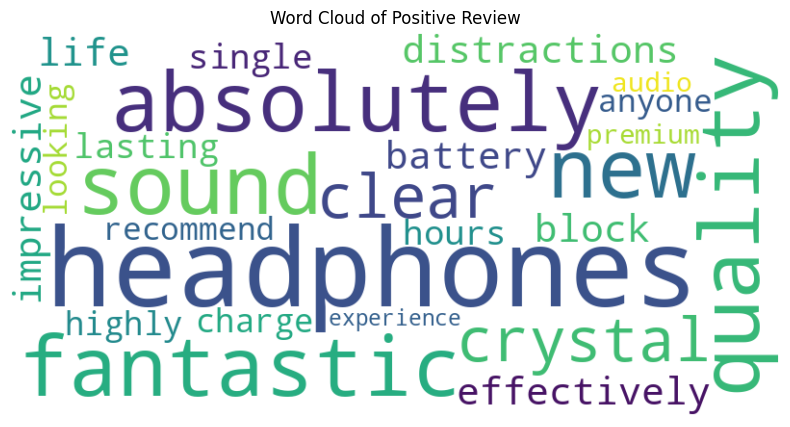

In [7]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon', quiet=True)

review = "The new noise-canceling headphones are absolutely fantastic! The sound quality is crystal clear, and they effectively block out all distractions. The battery life is also impressive, lasting for hours on a single charge. I highly recommend these headphones to anyone looking for a premium audio experience."

# 1. Use TextBlob or VADER to find polarity & subjectivity for each review.
blob = TextBlob(review)
polarity_blob = blob.sentiment.polarity
subjectivity_blob = blob.sentiment.subjectivity
print("TextBlob Polarity:", polarity_blob)
print("TextBlob Subjectivity:", subjectivity_blob)

analyzer_vader = SentimentIntensityAnalyzer()
vs = analyzer_vader.polarity_scores(review)
print("VADER Polarity Scores:", vs)

# 2. Classify reviews into Positive / Negative / Neutral.
if vs['compound'] >= 0.05:
    sentiment_vader = "Positive"
elif vs['compound'] <= -0.05:
    sentiment_vader = "Negative"
else:
    sentiment_vader = "Neutral"

print("VADER Sentiment:", sentiment_vader)

# 3. Create a word cloud using the wordcloud library for all positive reviews.
# (Since we only have one positive review here, we'll use it)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))
words = word_tokenize(review.lower())
filtered_words_wc = [word for word in words if word.isalnum() and word not in stop_words]
positive_text_wc = " ".join(filtered_words_wc)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text_wc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Review')
plt.show()

Question 6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# 1. Choose your own paragraph (~100 words) as training data.
text = """Artificial intelligence (AI) is rapidly transforming various aspects of our lives. From self-driving cars to virtual assistants, AI-powered systems are becoming increasingly prevalent. Machine learning, a subset of AI, enables computers to learn from data without explicit programming. Deep learning, a more advanced form of machine learning, utilizes neural networks with multiple layers to analyze complex patterns. The potential applications of AI are vast, spanning healthcare, finance, education, and entertainment. As AI continues to evolve, it promises to bring about significant societal and economic changes, presenting both opportunities and challenges that we must address thoughtfully."""

# 2. Tokenize text using Tokenizer() from keras.preprocessing.text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.eye(total_words)[y]

# Build a simple LSTM model
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')

# 3. Train the model
model.fit(X, y, epochs=100, verbose=0)

# Generate new lines of text
def generate_text(seed_word, num_lines=2):
    generated_text = ""
    for _ in range(num_lines):
        current_word = seed_word
        generated_text += seed_word
        for _ in range(10):  # Generate up to 10 words per line
            token_list = tokenizer.texts_to_sequences([current_word])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            predicted_probs = model.predict(token_list, verbose=0)[0]
            predicted_index = np.argmax(predicted_probs)
            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted_index:
                    output_word = word
                    break
            if output_word == "":
                break
            generated_text += " " + output_word
            current_word = output_word
        generated_text += ".\n"
    return generated_text

# Start generating from a seed word
seed_word = "AI"
generated_lines = generate_text(seed_word, num_lines=3)
print(f"Generated text starting with '{seed_word}':\n{generated_lines}")

Generated text starting with 'AI':
AI continues ai continues ai continues ai continues ai continues ai.
AI continues ai continues ai continues ai continues ai continues ai.
AI continues ai continues ai continues ai continues ai continues ai.

